<a id='top'></a>

# CSCI 3022: Intro to Data Science - Fall 2018 Practicum 
***

This practicum is due on Moodle by **11:55pm on Wednesday December 12**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
1. This is meant to be like a coding portion of your final exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.
1. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
2. You may **NOT** post to message boards or other online resources asking for help.
3. You may **NOT** copy-paste solutions *from anywhere*.
4. You may **NOT** collaborate with classmates or anyone else.
5. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on the practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**Name**:  Theodore Margoles

***


**NOTES**: 

- You may not use late days on the practicum nor can you drop your practicum grade. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3)

---

In [1]:
from scipy import stats
import numpy as np 
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

### [35 points] Problem 1: Yahtzee!

**Part A:** You are playing [Yahtzee](https://en.wikipedia.org/wiki/Yahtzee) with your friends. A player's turn in Yahtzee consists of rolling a set of 5 dice. Then the player is given two additional rolls, where they are allowed to re-roll any number of the dice, including potentially all of them or none of them. The goal is to obtain certain combinations of the dice values resulting after the third roll. Different combinations are worth different amounts of points, and the goal of the game is to get as many points as possible.

This game of Yahtzee is a bit unlike any you have ever played before, however. This is because Darth Ketelsen is back, and with her she brought her famous **5-sided dice**. These are fair dice with sides numbered 1-5. So, you are playing Yahtzee with a Sith Lord with 5-sided dice. Indeed, things just got real.

A **straight** in Darth Ketelsen's game consists of 5 values all in a row. For example, the outcome $[1,2,3,4,5]$ is a  straight but the outcome $[1,2,3,4,4]$ is not.

**Do two things:**
1. Compute by hand the probability of rolling a straight in a single roll of all 5 dice. Show all work.
2. Write a simulation to verify the probability that you computed. Run at least 10,000 simulations. 

rolling 5 dice at once is equivalent to taking 5 bernouli trials, so we can think about just rolling a dice 5 times and think about the probability of this being a straight.


The sample space of 5 rolls consists of a total of $5^5 =  3125$ possible outcomes

the event consists of {[1,2,3,4,5] ,  [5,4,3,2,1],} which is only 2 possible outcomes...

so the probability of rolling a straight then is: $\frac{2}{3125} = 0.00064$

In [22]:
def is_A_Straight(five_rolls): #definately finds all the straights!
    lastNum = five_rolls[0]
    AscendingCount = 0
    for index, item in iter(enumerate(five_rolls)): #this loop finds ascending straights (iter enumerate for the win!)
        if index != 0:
            if item == lastNum + 1:
                AscendingCount += 1     
        lastNum = item
    lastNum = five_rolls[0]
    DescendingCount = 0
    for index, item in iter(enumerate(five_rolls)): #this loop finds descending straights
        if index != 0:
            if item == lastNum -1:
                DescendingCount += 1
        lastNum = item
    if AscendingCount == 4 or DescendingCount == 4: #due to zero base indexing
        return 1
    else:
        return 0
                

def yahtzee_simulator(numtrials):
    rolls_data = []
    die = [1,2,3,4,5]
    for _ in range(1, numtrials + 1):
        five_rolls = []
        for __ in range(1, 6):
            five_rolls.append(np.random.choice(die, size=1, replace=True)) #make a die roll 5 times 
        val = is_A_Straight(five_rolls)
        rolls_data.append(val)
    return np.mean(rolls_data) #return the means of 0s and 1s which gives us the probability as estimated by numtrials trials

meanval = yahtzee_simulator(100000)
print("estimated probability of getting a straight with 5 sided dice: ", meanval)
print("error from calculated probability: ", np.abs(meanval - 0.00064))

estimated probability of getting a straight with 5 sided dice:  0.0007
error from calculated probability:  5.999999999999994e-05


**Part B:** The goal of this problem is to compute the probability of getting a straight using all three of your rolls, instead of just the single roll approach that you computed in Part A. Here, we'll need to implement a strategy so that after the first roll and after the second roll, we keep the dice that get us closer to a straight and re-roll the dice that are not useful for our straight.

For instance, suppose your first roll comes up $[1,2,3,3,3]$. You really want to get that straight! So, you would follow the strategy of saving the $[1,2,3]$ and re-roll two of the threes, hoping for a 4 and 5 to get the straight. Then, for your third roll, you would save as many of the dice as possible that would be part of a straight, and re-roll any remaining dice.

Finish the function below called `dire_straights` to simulate many complete 3-roll turns, and computes the probability of ending your turn with a straight. The only input to the function should be `ntrial`, an integer for the number of turns to simulate. Remember, each turn consists of 3 rolls.

Then, use your function to estimate the probability of a straight after a full turn of Yahtzee. Use at least 10,000 simulations, and comment on the results.

In [28]:
 def retain_best_first_cards(hand):
    newhand = []
    ascending_indices = []
    for index, item in iter(enumerate(hand)):
        if index != 0:
            if item == hand[index-1] + 1 :
                ascending_indices.append(index)
        else:
            if item == hand[index+1] - 1:
                ascending_indices.append(index)
    descending_indices = []             
    for index, item in iter(enumerate(hand)):
        if index != 0:
            if item == hand[index-1] - 1:
                descending_indices.append(index)
        else:
            if item == hand[index+1] + 1:
                descending_indices.append(index)
    if len(ascending_indices) >= len(descending_indices):            
        for i in ascending_indices:
            newhand.append(hand[i])
    else:
        for j in descending_indices:
            newhand.append(hand[j])
        
    return newhand
            
 
 def dire_straights(ntrial):
    die = [1,2,3,4,5]
    results = []
    for trial in range(ntrial):
        hand = []
        first_draw = np.random.choice(die, size=5, replace=True)
        best_straight = retain_best_first_cards(first_draw)
        turn = 0
        gotStraight = False
        while turn <= 2 and not gotStraight:
            if len(best_straight) == 5:
                gotStraight = True
            else:
                newcards = np.random.choice(die, size=5, replace=True)
                if len(best_straight) > 0:
                    upper = max(best_straight)
                else:
                    upper = 0
                appendthese = []
                for card in newcards:
                    if card > upper and len(best_straight) < 5:
                        best_straight.append(card)
                if is_A_Straight(best_straight):
                    gotStraight = True
            turn += 1
        if gotStraight is True:
            results.append(1)
        else:
            results.append(0)
    return results
            
            
print("after a full 3 rolls of yahtzee the odds of getting a straight are: ", np.mean(dire_straights(10000)))

after a full 3 rolls of yahtzee the odds of getting a straight are:  0.4586


**my resuls are that there is about a 46% chance of getting a straight in your three rolls, 
this is actually slightly lower than my intuition would lead me to expect so it makes sense in the context of being a cleverly designed game! However I also wonder if my simulation is missing any cases.**

**Part C:** Write a simulation to estimate the probability of obtaining a straight if the first roll contains exactly three distinct unique values. For example, a valid first roll could be $[1,5,3,3,3]$ but not $[1,3,3,4,5]$. You are still using the set of 5-sided dice.

After $10,000$ iterations my simulation predicts:  $0.447444352844188$

In [95]:
def is_only_three(hand):
    hashTable = {}
    hashTable[1] = 0
    hashTable[2] = 0
    hashTable[3] = 0
    hashTable[4] = 0
    hashTable[5] = 0
    
    for card in hand:
        hashTable[card] += 1
    
    ucount = 0
    for key in hashTable:
        if hashTable[key] > 0:
            ucount += 1
        
    if ucount == 3:
        return 1
    else:
        return 0

def three_on_first(ntrials):
    die = [1,2,3,4,5]
    results_three_unique = []
    for trial in range(ntrials):
        isThree = False
        hand = []
        first_draw = np.random.choice(die, size=5, replace=True)
        if is_only_three(first_draw) == 1:
            isThree = True
        best_straight = retain_best_first_cards(first_draw)
        turn = 0
        gotStraight = False
        while turn < 2 and not gotStraight:
            if len(best_straight) == 5:
                gotStraight = True
            else:
                newcards = []
                for p in range(5):
                    newcards.append(np.random.choice(die, size=1, replace=True))
                if len(best_straight) > 0:
                    upper = max(best_straight)
                else:
                    upper = 0
                appendthese = []
                for card in newcards:
                    if card > upper and len(best_straight) < 5:
                        best_straight.append(card)
                if is_A_Straight(best_straight):
                    gotStraight = True
            turn += 1
        if isThree is True and gotStraight is True:
            results_three_unique.append(1)
        elif isThree is True and gotStraight is False:
            results_three_unique.append(0)
    return np.mean(results_three_unique)

            
            
print("estimated prob: ", three_on_first(10000))

estimated prob:  0.447444352844188


**Part D:** Verify your calculation from Part C by hand. Show all work, and comment on whether the two agree.

*Hint: you will need to consider a variety of different cases - what are all the ways you could end up with a straight, given that your first roll contained exactly 3 unique values?*

Lets begin by considering how many ways you could end up with 3 unique values in your hand of 5 cards.

This should be $5\choose{3}$ = $\frac{5!}{(3!)(2!)}$ because this is the number of ways we can select 3 values from 5. 

$\frac{5!}{(3!)(2!)}$ = $10$

now we need to consider for each of these cases how many ways there are to then get a straight.

If we have 3 unique values out of 5 this implies that over the next 2 rolls, we must only pick up 2 unique values from the remaining 10 cards (2 draws) we have to get a straight. 

There are therefore $10\choose{2}$ = $45$ ways we could get 2 cards out of the remaining 10, and only 2 of these cases should satisfy the rest of the straight, 

so we have $\frac{2}{45}$ x $\frac{10}{1}$ = $\frac{20}{45}$ = $0.4444$

yes my calculation is very very close to the simulation! 

the simulated value: $0.447$ and the the actual value: $0.4444$

which is close enough for me!

In [36]:
def factorial(n):
    if n == 1 or n == 0:
        return 1
    else:
        return n*factorial(n-1)

def n_choose_r(n, r):
    return (factorial(n))/(factorial(r)*factorial(n-r))

print(n_choose_r(10, 2))
print(0.4461-0.4444)

45.0
0.0016999999999999793


**Part E:**  Your friend offers you the following deal. Each time your Yahtzee turn (i.e., all three rolls) results in a 5-of-a-kind, she will give you \$5. Each time your Yahtzee turn results in a straight, she will give you \$3. But, she will charge you \$1 for each turn (where a turn includes all 3 rolls of the five 5-sided dice). Should you take this deal? Fully justify your answer using calculations that include expected values. You may include some simulations to estimate relevant probabilities. Clearly state any assumptions you are making in your modeling choices.

**each time I roll either a straight of 5 of a kind I will have a straight so hypothetically the upper bound payout I will recieve is 3\$. Further the calculated probability of such an event is 0.44 so that would be a 44% chance of recieving 3\$ and a 100% chance of paying out 1\$. **

**the assumption here is that my calculated probability of 0.44 is the correct ratio of times that you would get a straight. Something in my intution still thinks that this number should be higher, however that would mean it would be even more profitable that my simulation, therefore I think I am safe in saying that I will take this deal. **

**my python simulations seam to solidly support my conclusion.**

In [40]:
ps = [0.56, 0.44]
choice = ["no straight", "straight"]

netMoney = 0
for i in range(100):
    c = np.random.choice(choice,replace=True,p=ps,size=1)
    if c == "straight":
        netMoney += 3
    netMoney -= 1
print("After 100 turns playing your net money gained is: ", netMoney)
    
for i in range(1000):
    c = np.random.choice(choice,replace=True,p=ps,size=1)
    if c == "straight":
        netMoney += 3
    netMoney -= 1    
    
print("After 1100 turns playing your net money gained is: ", netMoney)
    
for i in range(10000):
    c = np.random.choice(choice,replace=True,p=ps,size=1)
    if c == "straight":
        netMoney += 3
    netMoney -= 1 
    
print("After 11100 turns playing your net money gained is: ", netMoney)
    
    

After 100 turns playing your net money gained is:  29
After 1100 turns playing your net money gained is:  316
After 11100 turns playing your net money gained is:  3204


<br>

---
[Back to top](#top)
<a id='p2'></a>

### [30 points] Problem 2: Sharknado Prediction

Governor Hickenlooper has charged you with the task of assessing the factors associated with sharknado risk in Colorado. As everyone knows, sharknadoes are a leading cause of sharknado-related illness, and you are a world-renowned data/shark scientist.

You decide to use multiple linear regression to understand and predict what factors lead to increased sharknado hazard. Your lead scientist, aptly named Fin, has collected lots of relevant data at a local sharknado hotspot, the Boulder Reservoir[\*](#footnote). The data cover a variety of sharknado-related environmental and other conditions, and you'll find this data in the file `sharknadoes.csv`. 

**Response**: 

- $\texttt{sharknado hazard}$: the hazard of a sharknado, where 1 is very unlikely and 100 is highly likely

**Features**: 

- $\texttt{taunts}$: the number of times over the past year that someone has taunted a shark
- $\texttt{clouds}$: what percentage of the sky was covered by clouds (fraction, 0-1)
- $\texttt{precipitation}$: amount of precipitation in the past 72 hours (inches)
- $\texttt{earthquake}$: the intensity of the most recent earthquake measured in the continental United States
- $\texttt{shark attacks}$: the number of shark attacks within 72 hours prior to the observation
- $\texttt{ice cream sold}$: the number of units of ice cream sold at the beach concession stand 
- $\texttt{misery index}$: an economic indicator for how miserable the average United States citizen is, based on the unemployment rate and the inflation rate. More [here](https://www.stuffyoushouldknow.com/podcasts/whats-the-misery-index.htm) and [here](https://en.wikipedia.org/wiki/Misery_index_(economics)). Higher values correspond to more miserable citizens.
- $\texttt{temperature}$: the outside temperature, measured in degrees Fahrenheit
- $\texttt{humidity}$: relative humidity (percent, 0-100)
- $\texttt{pizzas sold}$: the number of pizzas sold at the beach concession stand in the past year
- $\texttt{pressure}$: local air pressure (millibar) 
- $\texttt{octopuses}$: the number of octupuses in the vicinity on the day of the observation
- $\texttt{Dan's shoe size}$: the size of the shoes Dan was wearing when the observation was made
- $\texttt{Tony's shoe size}$: the size of the shoes Tony was wearing when the observation was made

**Part A**: Read the data from `sharknadoes.csv` into a Pandas DataFrame.  Note that since we will be doing a multiple linear regression we will need all of the features, so you should drop any row in the DataFrame that is missing data. 

In [47]:
dfSharkys = pd.read_csv("data/sharknadoes.csv")
dfClean = dfSharkys.dropna(axis=0)
Y = dfClean['sharknado hazard'] #response
X = dfClean.iloc[:,:-1] #all features

dfClean.head()

,clouds,earthquake,pizzas sold,taunts,pressure,shark attacks,octopuses,precipitation,misery index,ice cream sold,humidity,temperature,Dans shoe size,Tonys shoe size,sharknado hazard
0,1.00,7.1,5560.0,15.0,847.12,2.0,7.0,0.824059,12.987180,273.0,86.41,78.0,42.0,9.0,40.22
1,1.00,7.4,5179.0,20.0,844.34,4.0,5.0,0.993296,16.765435,184.0,96.67,89.0,42.0,9.5,36.42
2,1.00,7.0,5227.0,0.0,839.48,9.0,2.0,1.173342,16.494518,141.0,53.85,65.0,9.5,9.0,19.54
3,0.13,7.9,5226.0,34.0,851.28,2.0,6.0,0.919291,8.277176,146.0,88.72,36.0,9.5,10.0,85.00
4,1.00,7.5,5491.0,6.0,852.67,2.0,4.0,1.729127,5.904750,178.0,63.08,72.0,42.0,9.0,56.34


**Part B**: Perform the appropriate statistical test at the $\alpha = 0.01$ significance level to determine if _at least one_ of the features is related to the the response $y$.  Clearly describe your methodology and show all computations in Python. 

We will perform an $F$-test for ML-regression at the $\alpha = 0.01$ confidence level. 

First we recall that the F-statistic is caluclated by: 

$\frac{Explained \space Variance}{Unexplained \space Variance}$==$\frac{MSM}{MSE}$ 

where $MSM$ = $\frac{SSM}{DFM}$ 

and where $MSE$ = $\frac{SSE}{DFE}$

now lets break it down to each piece:

$SSM$ = Sum of squared differences between the model and the mean. 
$DFM$ = correct degrees of freedome for the model, = $p-1$ = $15-1$ = $14$

$SSE$ = Sum of squared errors, this is the sum of differences between the actual data and the model. 
$DFE$ = degrees of freedome for error = $n-p$ = $72-15$ = $57$.


so new we can setup the following equations to solve:

$MSM$ = $\frac{SSM}{14}$ 

$MSE$ = $\frac{SSE}{57}$

so, $F$ = $\frac{\frac{SSM}{14}}{\frac{SSE}{57}}$ = 179.4 as shown by python below, 

this gives us a **p-value of 9.60e-42** which is well below our **alpha level of 0.01**, so we can **reject the null hypothesis
and instead conclude that there is at least one feature that has a slope $B_{j}$ $\ne $ $0$. **

that is, at least one of the features in the feature set is relevant to the result; the hazard of sharknadoes. 

In [48]:
#I use python to do the heavy lifting and just look at my fvalue and pvalue for the f-statistic
x = sm.add_constant(X) 
model = sm.OLS(Y, x).fit() 
print(model.fvalue)
print(model.f_pvalue)
model.summary()

179.35849974932614
9.599519434024341e-42


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       sharknado hazard   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 12 Dec 2018   Prob (F-statistic):           9.60e-42
Time:                        09:45:33   Log-Likelihood:                -174.23
No. Observations:                  72   AIC:                             378.5
Df Residuals:                      57   BIC:                             412.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2549.8985     67.605    -37.718      0.000   -2685.275   -2414.522
clouds             -1.5106      2.566     -0.589      0.558      -6.650       3.628
earthquake          2.5079      0.467      5.367      0.000       1.572       3.444
pizzas sold        -0.0006      0.002     -0.373      0.711      -0.004       0.003
taunts              0.3117      0.042      7.447      0.000       0.228       0.396
pressure            3.0688      0.079     38.850      0.000       2.911       3.227
shark attacks      -0.1151      0.144     -0.797      0.429      -0.404       0.174
octopuses          -0.0749      0.143     -0.524      0.602      -0.361       0.211
precipitation       1.3982      0.930      1.503      0.138      -0.464       3.261
misery index        0.0273      0.080      0.340      0.735      -0.133       0.188
ice cream sold      0.0096      0.008      1.193      0.238      -0.007       0.026
humidity            0.0188      0.027      0.706      0.483      -0.035       0.072
temperature        -0.4426      0.053     -8.396      0.000      -0.548      -0.337
Dans shoe size      0.0271      0.023      1.175      0.245      -0.019       0.073
Tonys shoe size     0.2814      1.273      0.221      0.826      -2.268       2.831
==============================================================================
Omnibus:                        0.821   Durbin-Watson:                   2.225
Prob(Omnibus):                  0.663   Jarque-Bera (JB):                0.300
Skew:                           0.005   Prob(JB):                        0.861
Kurtosis:                       3.316   Cond. No.                     1.03e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Part C**: Write a function `backward_select(df, resp_str, maxsse)` that takes in the DataFrame (`df`), the name of the column corresponding to the response (`resp_str`), and the maximum desired sum of squared errors (`maxsse`), and returns a list of feature names corresponding to the most important features via backward selection.  Use your code to determine the reduced MLR model with the minimal number of features such that the SSE of the reduced model is less than 570. At each stage in backward selection you should remove the feature that has the highest p-value associated with the hypothesis test for the given slope coefficient $\beta_k \neq 0$.

Your code should clearly indicate which feature was removed in each stage, and the SSE associated with the model fit before the feature's removal. _Specifically, please write your code to print the name of the feature that is going to be removed and the SSE before its removal_. Afterward, be sure to report all of the retained features and the SSE of the reduced model.

**Note**: The point of this exercise is to see if you can implement **backward_select** yourself.  You may of course use canned routines like statmodels OLS, but you may not call any Python method that explicitly performs backward selection.

In [49]:
def backward_select(df, resp_str, maxsse):
    Y = df[resp_str] #response
    X = df.iloc[:,:-1] #all features except the response initially
    X = sm.add_constant(X) #add the initial constant
    model = sm.OLS(Y, X).fit() #make the initial fit

    params = model.params #get the initial parameters
    indices = params.index #get all initial variables.... etc etc
    pvalue = model.f_pvalue
    fvalue = model.fvalue
    sse = oldsse = model.ess
    numparamsleft = 14
    while sse >= maxsse and numparamsleft > 1: #while we have not optimized enough and while we still have features to remove with backward select
        worstSlopeSeen = max(np.abs(params))
        worstSlopeCol = 'null'
        for index, param in iter(enumerate(params)):
            #print(index, param, indices[index])
            if np.abs(param) < worstSlopeSeen and indices[index] != 'const': #find feature with the least slope
                worstSlopeSeen = np.abs(param)
                worstSlopeCol = indices[index]
        print("backward select is dropping the feature: ", worstSlopeCol, " from the data!!!")
        df = df.drop(axis=1, labels=[worstSlopeCol])
        X = df.iloc[:,:-1] #all features except the response initially
        X = sm.add_constant(X) 
        model = sm.OLS(Y, X).fit() #update all variables and models with new params!
        params = model.params
        indices = params.index
        pvalue = model.f_pvalue
        fvalue = model.fvalue
        sse = model.ess
        numparamsleft -= 1
    print("oldsse: ", oldsse)
    print("newsse: ", sse)
    print("===remaining features and their slopes!===")
    print(model.params)
    return df, model, model.params, oldsse, sse
    
dfCurr, modelnew, paramList, oldsse, newsse = backward_select(dfClean, "sharknado hazard", 6000)

backward select is dropping the feature:  pizzas sold  from the data!!!
backward select is dropping the feature:  ice cream sold  from the data!!!
backward select is dropping the feature:  humidity  from the data!!!
backward select is dropping the feature:  misery index  from the data!!!
backward select is dropping the feature:  Dans shoe size  from the data!!!
backward select is dropping the feature:  shark attacks  from the data!!!
backward select is dropping the feature:  octopuses  from the data!!!
backward select is dropping the feature:  taunts  from the data!!!
backward select is dropping the feature:  precipitation  from the data!!!
backward select is dropping the feature:  temperature  from the data!!!
backward select is dropping the feature:  Tonys shoe size  from the data!!!
backward select is dropping the feature:  pressure  from the data!!!
oldsse:  23477.74879453735
newsse:  5531.396369760583
===remaining features and their slopes!===
const         22.671217
clouds       

**Part D**: Write down the multiple linear regression model, including estimated parameters, obtained by your backward selection process. 

$y_{i} = B_0 +B_{1}X_1 + B_{2}X_2$


$y_{i} = 22.67 -19.64X_{1i} + 7.593021X_{2i}$

where $X_1$ is the cloud data and $X_2$ is the earthquake data. 

**Part E**: Perform the appropriate statistical test at the $\alpha = 0.01$ significance level to determine whether there is a statistically significant difference between the full model with all features and the reduced model obtained by backward selection in **Part D**. You may use output from your model fit above, but all calculations should be set up in Markdown/MathJax.

now we want to see if we really made a difference by removing all those features from the data, 

so we must set up an f-statistic of the following form: 

$F$ = $\frac{\frac{(SSE_{full} - SSE_{red})}{p-k}}{\frac{SSE_{full}}{(n-p-1)}}$


== $F$ = $\frac{\frac{23477.75 - 5531.396}{p-k}}{\frac{5531.396}{(n-p-1)}}$
== $F$ = $\frac{\frac{23477.75 - 5531.396}{2}}{\frac{5531.396}{(14)}}$ == $22.7$

so $p-k$ represents the degrees of freedom of reduced, and n-p-1 is the degrees of freedom of the full so 
we have 
$p-k$ = 2
$n-p-1$ = 14

Now, the pvalue from the f-test is:
$1$ - $stats.f.cdf(22.7, 2, 14)$ = $4.040090883750125e-05$ which is below our alpha level of $0.01$, 

therefore we can reject the null hypothesis and conclude that there is a significant difference between the $SSE_{full}$ and the $SSE_{red}$ and therefore a statistically significant difference between the full and reduced model, namely that the reduced model is actually better since the Sum of Squared Error is lower. 


In [51]:
print("SSEfull: ", oldsse, "\n SSEred: ", newsse)
model.summary()

1 - stats.f.cdf(22.7, 2, 14)

SSEfull:  23477.74879453735 
 SSEred:  5531.396369760583


4.040090883750125e-05

**Part F**: Based on your conclusions in **Part E**, use the _better_ of the two models to predict the sharknado hazard when the following features are observed: 

- $\texttt{taunts}$: 47
- $\texttt{clouds}$: 0.8
- $\texttt{precipitation}$: 1 inch
- $\texttt{earthquake}$: 5
- $\texttt{shark attacks}$: 11
- $\texttt{ice cream sold}$: 120
- $\texttt{misery index}$: 15
- $\texttt{temperature}$: 70 degrees F
- $\texttt{humidity}$: 83
- $\texttt{pizzas sold}$: 5500
- $\texttt{pressure}$: 850 millibar 
- $\texttt{octopuses}$: 6
- $\texttt{Dan's shoe size}$: 9.5
- $\texttt{Tony's shoe size}$: 9

In [44]:
clouds = 0.8
earthquake = 5

print("linear regression model predicts: ", 22.67 - (19.64*0.8) + (7.59302*5))

linear regression model predicts:  44.9231


# The linear Regression Model is:

$y_{i} = 22.67 -19.64X_{1i} + 7.593021X_{2i}$

where $X_1$ is the cloud data and $X_2$ is the earthquake data. 


for the input data we have clouds = $0.8$ and earthquake = $5$ which when plugged into the formula above

gives us: $44.9231$ = **Predicted Sharknado Hazard**

**Part G:** Consider the model you used in Part E, and consider the fact that you are trying to predict **sharknado hazard**. What is one critical drawback to the MLR model (or any MLR model) for predicting shardnado hazard? What are some modifications that could improve on this issue?

**Although MLR gives us a good model if we imagine that all the variables are independent, and all have their own slope to be found distinct and non-dependent on any other variable, in some datasets many features may be codependent; they may be complicated functions of eachother to some degree and to some degree be random or independent from one another, the MLR model gives us no way of letting the slopes be dependent on eachother; this assumption of independence is built in. **

**Therefore, if we could analyze each slope vs each other slope and try to find codependencies there we might be able to have a far more accurate model with less overall error since it addresses the complex nature of the data at hand!**

<br>

---
[Back to top](#top)
<a id='p3'></a>

### [35 points] Problem 3: FlipMaster5000

In the file `flips.csv` you'll find the results of an experiment that was conducted with Stella O'Flaherty (the famous octopus data scientist) flipping coins. Her experiment was as follows. 

1. She reaches into her coin purse and grabs one of two coins, labeled $x$ and $y$. 
2. She flips her coin until it comes up heads 8 times, and records the coin ID and the number of flips it took to get 8 heads. 
3. She then replaces the coin in her coin purse and repeats the experiment. 

**Part A:**

By considering the total number of flips and the total number of "heads" in the data file for each coin, estimate the bias of each coin $p_x$ and $p_y$, and use an appropriate statistical test to determine whether the coins have the same bias, i.e. whether $p_x$ and $p_y$ are the same. Perform your test at a significance level that will mistakenly reject the null hypothesis _when that null hypothesis is actually true_ 5% of the time. Report a p-value for your test, and clearly state your conclusions.

**my method for estimating the paramters will be to take the proportion of the rolls that were heads to the number flips for each coin in total:
so we just have to add up 8 times however many times we saw each coin out of the total number of coin flips that coin has been flipped!**

note that $\alpha$ = $0.05$

so we get:


$p_x$ = $\frac{24}{9+13+12}$
$p_y$ = $\frac{16}{12+20}$

$p_x$ = $\frac{24}{34}$ = $0.7059$
$p_y$ = $\frac{16}{32}$ = $0.5$

$n_x$ = $34$ flips for x

and $n_y$ = $32$ flips for y

each sample group actually has more than 30 total flips or more so we can use a z-distribution to represent the difference in sample proportions, 
$p_x$ - $p_y$

# Calculating the p-value and what it tells us about our Test!

Z = $\frac{0.2059}{\sqrt{\frac{0.7059(1-0.7059)}{34} + \frac{0.25}{32}}}$ = $1.74526$

now to get the p-value we take:

($1$ - **stats.norm.cdf**$(1.74526))x(2)$  = $0.08094$ which is MORE than our $\alpha = 0.05$ 

the reason we are multiplying by 2 is because we need the probability for both tails of the test!

so we cannot reject $H_o$ and we cannot claim that $P_x$ is really any different from $P_y$.



In [93]:
dfFlips = pd.read_csv("data/flips.csv")
print(dfFlips.head())
x =[]
y =[]
isfirstp = True
for lame_dataframe_row in dfFlips.values:
    row = list(lame_dataframe_row[0])
    coin = row[0]
    if not isfirstp:
        times_flipped = row[2] + row[3]
        
    else:
        isfirstp = False
        times_flipped = row[2]
    if coin == 'x':
        print("ts flipped: ", times_flipped)
        x.append(int(times_flipped))
    else:
        print("ts flipped: ", times_flipped)
        y.append(int(times_flipped))
mean_flips_thx = np.mean(x)
mean_flips_thy = np.mean(y)

print(mean_flips_thx, mean_flips_thy)
print(n_choose_r(10, 7))
stats.norm.ppf(1-(0.05/2))

term = 1.96*(np.sqrt(((0.7059*(1-0.7059))/34)+ (0.25/32)))

print

upper = .2059 + term
lower = .2059 - term
print(lower, upper, term)


z = 0.2059/(np.sqrt((((0.7059)*(1-0.7059))/34) + (0.25/32)))
pval = (1 - stats.norm.cdf(z))*2

print("z is: ", z, " \n pval is: ", pval)

  Coin ID\tFlips Required
0                    x\t9
1                   x\t13
2                   x\t12
3                   y\t12
4                   y\t20
ts flipped:  9
ts flipped:  13
ts flipped:  12
ts flipped:  12
ts flipped:  20
11.333333333333334 16.0
120.0
-0.025334608257501112 0.4371346082575011 0.2312346082575011
z is:  1.7452577840363506  
 pval is:  0.08094000686110525


**Part B:** 

You learn that, actually, the coin $x$ is from a manufacturer that produces coins whose biases follow some statistical regularity. In particular, the bias of the $x$ coin is in the set $$p_x \in \{0.1, 0.2, 0.3, \dots, 0.9\}.$$ Furthermore, these biases all occur with equal probability. In other words, $\tfrac{1}{9}$ of coins have bias $p_x=0.1$, $\tfrac{1}{9}$ of coins have bias $p_x=0.2$, and so on. 

For each possible value of $p_x$, compute the probability that Stella's $x$ coin has bias of $p_x$, given the data in her data file. 

Plot your results with $p_x$ on the horizontal axis and $Pr(p_x \mid \text{data})$ on the vertical axis. Make the points or lines that you plot blue. Plots without axis labels will receive zero credit.

_Hint_: We have done problems like this before! Think back to how you solved the problem on the midterm where you determined the probability that someone had ESP, given that they guessed the cards correctly. There was a "rule", and maybe a "law" involved in your calculation...

first lets use bayes rule to get a hold on this problem! we will also need law of total prob!

let the event $(X_p == 0.1)$ represent the probability that the proportion of the x coin is 0.1

let the event $(\frac{24}{34}H)$ represent the probability that we flipped the x coin 24/34 times as a head OVERALL

ok so what we are trying to compute for each $\hat{X_p} $ = ${.1,.2,.3,.4,.5,...,.9}$ 

$P((X_p == \hat{X_p}) \mid (\frac{24}{34}H))$ 

this is the term I will apply bayes rule to!

applying bayes rule we get:

$P((X_p == \hat{X_p}) \mid (\frac{24}{34}H))$  = $\frac{P((\frac{24}{34}H)\space \mid \space (X_p == \hat{X_p}))P(X_p == \hat{X_p})}{P(\frac{24}{34}H)}$


alright, we almost have the general term to calculate each and every probability for each $\hat{X_p}$ in the set,

why? because the term $P((\frac{24}{34}H)\space \mid \space (X_p == \hat{X_p}))$ is just a negative binomial distribution with a specific r, k, and p values

$P((\frac{24}{34}H)\space \mid \space (X_p == \hat{X_p}))$ = ${r-1}\choose{k-1}$$p^r$$(1-p)^{k-r}$ where r = 24, k = 34 and p = $\hat{X_p}$, and we also know that $P(X_p == \hat{X_p})$ = $\frac{1}{9}$ for all values of $\hat{X_p}$


so the expression becomes:

$\frac{{{k-1}\choose{r-1}}p^r(1-p)^{k-r}P(X_p == \hat{X_p})}{P(\frac{24}{34}H)}$

$\frac{{{33}\choose{23}}(\hat{X_p})^{24}(1-\hat{X_p})^{10}\frac{1}{9}}{P(\frac{24}{34}H)}$


now overall we have:

$P((X_p == \hat{X_p}) \mid (\frac{24}{34}H))$ = $\frac{{{33}\choose{23}}(\hat{X_p})^{24}(1-\hat{X_p})^{10}\frac{1}{9}}{P(\frac{24}{34}H)}$


the next thing we have to do is to apply the law of total probability to the bottom of the fraction. 


the bottom of the fraction, $P(\frac{24}{34}H)$ is really the sum of disjoint events in the probability space:

that is $P(\frac{24}{34}H)$ = $\Sigma_{\hat{X_p} \in {0.1,...,0.9}}{P(\frac{24}{34}H \mid X_p=\hat{X_p})\frac{1}{9}}$


so the final, general form equation to calculate the probability of each value in the set is:


$P((X_p == \hat{X_p}) \mid (\frac{24}{34}H))$ = $\frac{{{33}\choose{23}}(\hat{X_p})^{24}(1-\hat{X_p})^{10}\frac{1}{9}}{\Sigma_{\hat{X_p} \in {0.1,...,0.9}}{P(\frac{24}{34}H \mid X_p=\hat{X_p})\frac{1}{9}}}$

the 1/9ths cancel and we get:

$P((X_p == \hat{X_p}) \mid (\frac{24}{34}H))$ = $\frac{{{33}\choose{23}}(\hat{X_p})^{24}(1-\hat{X_p})^{10}}{\Sigma_{\hat{X_p} \in {0.1,...,0.9}}{P(\frac{24}{34}H \mid X_p=\hat{X_p})}}$


but $P(\frac{24}{34}H \mid X_p=\hat{X_p})$ is just = ${{33}\choose{23}}(\hat{X_p})^{24}(1-\hat{X_p})^{10}\frac{1}{9}$

so the formula then becomes:

$P((X_p == \hat{X_p}) \mid (\frac{24}{34}H))$ = $\frac{{{33}\choose{23}}(\hat{X_p})^{24}(1-\hat{X_p})^{10}}{\Sigma_{\hat{X_p} \in {0.1,...,0.9}}{{{33}\choose{23}}(\hat{X_p})^{24}(1-\hat{X_p})^{10}}}$


now we can let python calculate the value for each value of $\hat{X_p}$
= all values from python in one array = [1.5997448017189437e-16, 8.265047980417788e-10, 3.6602953207363036e-06, 0.0007808685091131031, 0.026705810356336474, 0.22795836622095855, 0.5190283984622512, 0.22186319234853222, 0.003659702980982689]

as python has so graciously calculated the values are:


$P((X_p == 0.1) \mid (\frac{24}{34}H))$ = $1.5997448017189437e-16$


$P((X_p == 0.2) \mid (\frac{24}{34}H))$ = $8.265047980417788e-10$


$P((X_p == 0.3) \mid (\frac{24}{34}H))$ = $3.6602953207363036e-06$


$P((X_p == 0.4) \mid (\frac{24}{34}H))$ = $0.0007808685091131031$


$P((X_p == 0.5) \mid (\frac{24}{34}H))$ = $0.026705810356336474$


$P((X_p == 0.6) \mid (\frac{24}{34}H))$ = $0.227958366220958554$


$P((X_p == 0.7) \mid (\frac{24}{34}H))$ = $0.5190283984622512$


$P((X_p == 0.8) \mid (\frac{24}{34}H))$ = $0.22186319234853222$


$P((X_p == 0.9) \mid (\frac{24}{34}H))$ = $0.003659702980982689$





the respective values of xp:  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] 

results indexed the same [1.5997448017189437e-16, 8.265047980417788e-10, 3.6602953207363036e-06, 0.0007808685091131031, 0.026705810356336474, 0.22795836622095855, 0.5190283984622512, 0.22186319234853222, 0.003659702980982689]


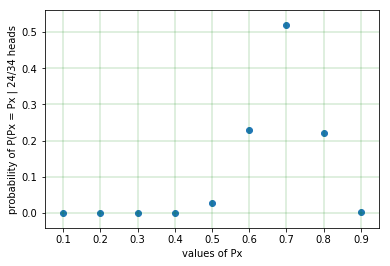

In [58]:
ps=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
p = [1/9 for i in range(1, 10)]
def get_pxp_given_kofrheads(xp, ps, k=34, r=24):
    top_part = n_choose_r(33, 23)*(xp**24)*((1-xp)**10)
    bot_part = sum([n_choose_r(33, 23)*(i**24)*((1-i)**10) for i in ps])
    if top_part < bot_part:
        return top_part / bot_part
    else:
        print("error: top of fraction somehow bigger than bottem of fraction....")
        print("top: ", top_part, " bottom: ", bot_part)
        return 0.0
results_x = []
for xp in ps:
    results_x.append(get_pxp_given_kofrheads(xp, ps))
    
print("the respective values of xp: ", ps, "\n\nresults indexed the same",  results_x)

plt.scatter(ps, results_x)
plt.xlabel("values of Px")
plt.ylabel("probability of P(Px = Px | 24/34 heads")
plt.grid(True, color='g', linestyle='-', linewidth=0.25)
plt.show()

**Part C:**

You learn that, actually, the coin $y$ is from a different manufacturer that produces coins whose biases follow some statistical regularity. In particular, the bias of the $y$ coin is in the set $$p_y \in \{0.1, 0.2, 0.3, \dots, 0.9\}.$$ Furthermore, these biases all occur with different probability. In particular, the probability that a coin has bias $p_y$ is proportional to $p_y$, which could be written as 
$$Pr(p_y) \propto p_y \quad \text{for} \quad p_y \in \{0.1, 0.2, 0.3, \dots, 0.9\}$$

First, write clearly the PMF for $p_y$, based on the information above. 

Then, for each possible value of $p_y$, compute the probability that Stella's $y$ coin has bias of $p_y$, given the data in her data file. 

Plot your results with $p_y$ on the horizontal axis and $Pr(p_y \mid \text{data})$ on the vertical axis. Make the points or lines that you plot red. Plots without axis labels will receive zero credit.

let us agani apply bayes rule, remembering that for the y coin we had a total of 16 heads and flips overall. (implying also 16 tails)

let $P(y_p = \hat{y_p})$ signify the probability that the propotion of y is one of the values in the set. 


and let $P(\frac{16H}{32})$ signify the probability that we got 16H out of 32 tries.

let $S$ be the set with all values of $\hat{y_p} \in S$


$P(y_p = \hat{y_p} \mid \frac{16H}{32} ) = \frac{P(\frac{16H}{32} \mid y_p = \hat{y_p})P(y_p = \hat{y_p})}{P(\frac{16H}{32})}$

first this time lets apply the law of total probability to the bottom of the fraction:


we know that $P(\frac{16H}{32})$ = $\Sigma_{\hat{y_p} \in S}{P(\frac{16H}{32} \space |  \space y_p = \hat{y_p})P(y_p = \hat{y_p})}$

so now we have:

$ = \frac{P(\frac{16H}{32} \mid y_p = \hat{y_p})P(y_p = \hat{y_p})}{\Sigma_{\hat{y_p} \in S}{P(\frac{16H}{32} \space |  \space y_p = \hat{y_p})P(y_p = \hat{y_p})}}$

now, we can use the negative binomial distribution again, to get values for $P(\frac{16H}{32} \mid y_p = \hat{y_p})$

for each value of $\hat{y_p}$.


$P(y_p = \hat{y_p} \mid \frac{16H}{32} ) = \frac{{{31}\choose{15}}{\hat{y_p}^{16}}{{(1-\hat{y_p})}^{16}}P(y_p = \hat{y_p})}{\Sigma_{\hat{y_p} \in S}{P(\frac{16H}{32} \space |  \space y_p = \hat{y_p})P(y_p = \hat{y_p})}}$



now we can replace $P(y_p = \hat{y_p})$ with $\hat{y_p}$ since this is proportional the probability of it having that value

now we can also resplace $P(\frac{16H}{32} \space |  \space y_p = \hat{y_p})$ in the denominator with:


${{31}\choose{15}}{\hat{y_p}^{16}}{{(1-\hat{y_p})}^{16}}$




$P(y_p = \hat{y_p} \mid \frac{16H}{32} ) = \frac{{{31}\choose{15}}{\hat{y_p}^{16}}{{(1-\hat{y_p})}^{16}}\hat{y_p}}{\Sigma_{\hat{y_p} \in S}{{{31}\choose{15}}{\hat{y_p}^{16}}{{(1-\hat{y_p})}^{16}}\hat{y_p}}}$


now that I have the general form, I convert it to python with the code below and let python fill up my results array
with all the probabilities that the Y coin has each bias given the data!

my results array was: [7.351176475615182e-09, 0.00014636135310578625, 0.017025766312305384, 0.19227222693869797, 0.46183499800161, 0.2884083404080469, 0.039726788062046006, 0.0005854454124231425, 6.616058828053635e-08]

which corresponds to my final results of:


$P(y_p = 0.1 \mid \frac{16H}{32}) = 7.351176475615182e-09$


$P(y_p = 0.2 \mid \frac{16H}{32}) = 0.00014636135310578625$


$P(y_p = 0.3 \mid \frac{16H}{32}) = 0.017025766312305384$


$P(y_p = 0.4 \mid \frac{16H}{32}) = 0.19227222693869797$


$P(y_p = 0.5 \mid \frac{16H}{32}) = 0.46183499800161$



$P(y_p = 0.6 \mid \frac{16H}{32}) = 0.2884083404080469$


$P(y_p = 0.7 \mid \frac{16H}{32}) = 0.039726788062046006$


$P(y_p = 0.8 \mid \frac{16H}{32}) = 0.0005854454124231425$



$P(y_p = 0.9 \mid \frac{16H}{32}) = 6.616058828053635e-08$




graph is plotted below!

[7.351176475615182e-09, 0.00014636135310578625, 0.017025766312305384, 0.19227222693869797, 0.46183499800161, 0.2884083404080469, 0.039726788062046006, 0.0005854454124231425, 6.616058828053635e-08]


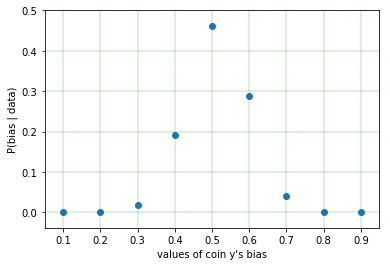

In [56]:
def getProb(numHeads, numFlips, Yp, YpArray):
    top_frac = n_choose_r(numFlips-1, numHeads-1)*(Yp**numHeads)*((1-Yp)**(numFlips-numHeads))*Yp
    bottom_frac = sum([(n_choose_r(numFlips-1, numHeads-1)*(Yi**numHeads)*((1-Yi)**(numFlips-numHeads))*Yi) for Yi in YpArray])
    return top_frac / bottom_frac

YpArray = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
results = [getProb(16, 32, Yval, YpArray) for Yval in YpArray]
print(results)
plt.scatter(YpArray, results)
plt.xlabel("values of coin y's bias")
plt.ylabel("P(bias | data)")
plt.grid(True, color='g', linestyle='-', linewidth=0.25)
plt.show()

**Part D:**

The information that you have about the manufacturer of coin $x$ and coin $y$ is called _prior information_ since it can influence the estimates of a coin's bias at which you arrive, given the data from the coin's flipping. We often call the distribution $Pr(p_x)$ or $Pr(p_y)$ a _prior distribution_, and call $Pr(p_x \mid \text{data})$ or $Pr(p_y \mid \text{data})$ a _posterior distribution_, since it represents the estimate that you arrive at after you have taken the data into account. 

You have already computed posterior distributions for each coin's bias. However, you'll now investigate the importance of the prior by _switching the priors for the two coins_.

In other words, using the prior probabilities $Pr(p_x)$, what is your posterior distribution of $Pr(p_y \mid \text{data from y})$? Similarly, using the prior probabilities $Pr(p_y)$, what is your posterior distribution of $Pr(p_x \mid \text{data from x})$? 

Create two plots. 

1. In the first plot, show your results from Part B (the posterior distribution for $p_x$ with the correct prior) plotted with a blue solid line as well as your results from Part D for the posterior distribution for $p_x$ with the incorrect prior with a blue dashed line.  

2. In the second plot, show your results from Part C (the posterior distribution for $p_y$ with the correct prior) with a red solid line as well as your results from Part D for the posterior distribution for $p_y$ with the incorrect prior with a red dashed line.  

[2.3032972190833458e-17, 2.3799873590376906e-10, 1.5810174268202238e-06, 0.0004497147954042127, 0.019225384780441952, 0.19692736132138264, 0.5231044763284638, 0.2555491967990066, 0.0047422847198752525]
[7.351176475615182e-09, 0.00014636135310578625, 0.017025766312305384, 0.19227222693869797, 0.46183499800161, 0.2884083404080469, 0.039726788062046006, 0.0005854454124231425, 6.616058828053635e-08]


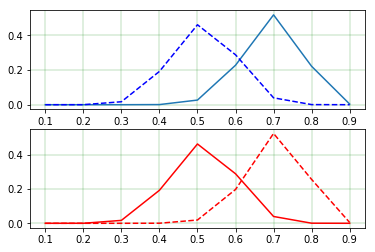

In [77]:
fig, ax = plt.subplots(2, 1)

ax[0].plot(ps, results_x)
ax[0].grid(True, color='g', linestyle='-', linewidth=0.25)

ax[1].plot(YpArray, results, color='r')
ax[1].grid(True, color='g', linestyle='-', linewidth=0.25)

y_new_posterior = [getProb(24, 34, xi, YpArray) for xi in YpArray]
print(y_new_posterior)

ax[1].plot(ps, y_new_posterior, linestyle='dashed', color='r')


x_new_posterior = [getProb(16, 32, xi, ps) for xi in ps]
print(x_new_posterior)

ax[0].plot(YpArray, x_new_posterior, linestyle='dashed', color='b')

#def getProb(numHeads, numFlips, Yp, YpArray):
 #   top_frac = n_choose_r(numFlips-1, numHeads-1)*(Yp**numHeads)*((1-Yp)**(numFlips-numHeads))*Yp
 #   bottom_frac = sum([(n_choose_r(numFlips-1, numHeads-1)*(Yi**numHeads)*((1-Yi)**(numFlips-numHeads))*Yi) for Yi in YpArray])
 #  return top_frac / bottom_frac

#YpArray = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
#results = [getProb(16, 32, Yval, YpArray) for Yval in YpArray]

so the prior $Pr(P_y)$ = $\{0.1, 0.2, ... 0.9\}$

and the prior $Pr(P_x)$ = $\{\frac{1}{9} \space \mid \space e \in \hat{S}\}$ where $\hat{S}$ is the set of biases for $P_x$.


so, then, what does it mean to switch these priors? 
it means to calcualte the P(Pr(Py=Px) for each value of Px)
and to calcluate the P(Pr(Px=Py for each value of Py) and graph those, and you just end up graphing the other distribution.

this is an interesting result!

**Part E:**

What is the name of the distribution that Stella's experiment is drawn from?

The Negative Binomial Distribution. 

<br>

---
[Back to Problem 2](#p2)

<a id='footnote'></a> Yeah yeah - fresh water versus salt water - I know, I know. But sharknadoes also are not real, so...